In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../input/forbes-billionaires-2022/2022_forbes_billionaires.csv')

In [34]:
df.shape

(2600, 8)

In [35]:
df.columns

Index(['Unnamed: 0', 'rank', 'name', 'networth', 'age', 'country', 'source',
       'industry'],
      dtype='object')

In [36]:
df.dtypes

Unnamed: 0     int64
rank           int64
name          object
networth      object
age            int64
country       object
source        object
industry      object
dtype: object

In [37]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  rank                       name networth  age  \
0              0     1                 Elon Musk    $219 B   50   
1              1     2                Jeff Bezos    $171 B   58   
2              2     3  Bernard Arnault & family    $158 B   73   
3              3     4                Bill Gates    $129 B   66   
4              4     5            Warren Buffett    $118 B   91   
...          ...   ...                        ...      ...  ...   
2595        2595  2578    Jorge Gallardo Ballart      $1 B   80   
2596        2596  2578              Nari Genomal      $1 B   82   
2597        2597  2578            Ramesh Genomal      $1 B   71   
2598        2598  2578            Sunder Genomal      $1 B   68   
2599        2599  2578     Horst-Otto Gerberding      $1 B   69   

            country                  source                industry  
0     United States           Tesla, SpaceX             Automotive   
1     United States  

In [38]:
missing_values = df.isnull().sum()
print("Пропуски в данных:\n", missing_values)

Пропуски в данных:
 Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64


In [39]:
duplicate_rows = df[df.duplicated()]
print(f"Количество дубликатов: {len(duplicate_rows)}")

Количество дубликатов: 0


In [40]:
df['networth'] = df['networth'].replace({'\$': '', ' B': ''}, regex=True).astype(float)


In [41]:
df.head(5)

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


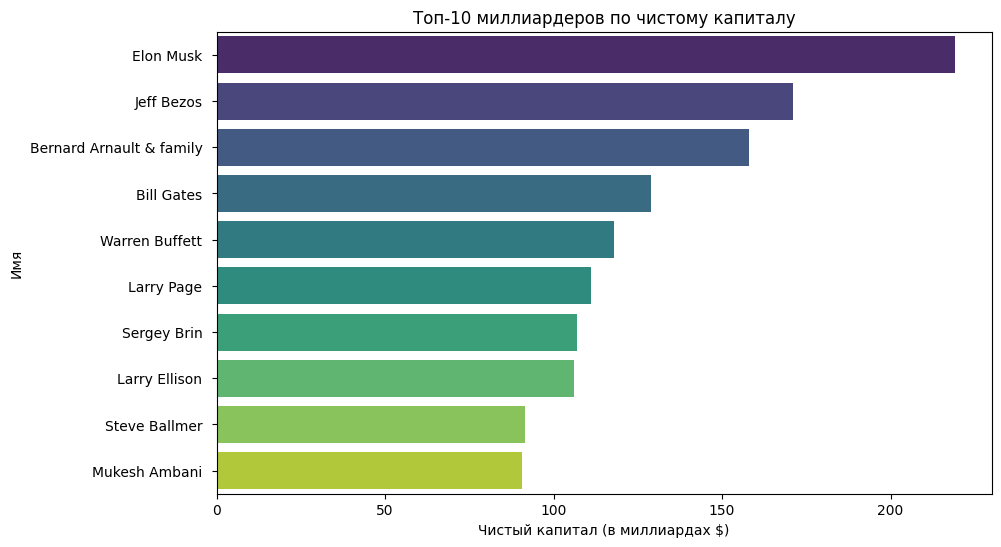

In [42]:
#1 Топ-10 миллиардеров по чистому капиталу (Arlan)
top_10_billionaires = df.nlargest(10, 'networth')
plt.figure(figsize=(10, 6))
sns.barplot(x='networth', y='name', data=top_10_billionaires, palette='viridis')
plt.title('Топ-10 миллиардеров по чистому капиталу')
plt.xlabel('Чистый капитал (в миллиардах $)')
plt.ylabel('Имя')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


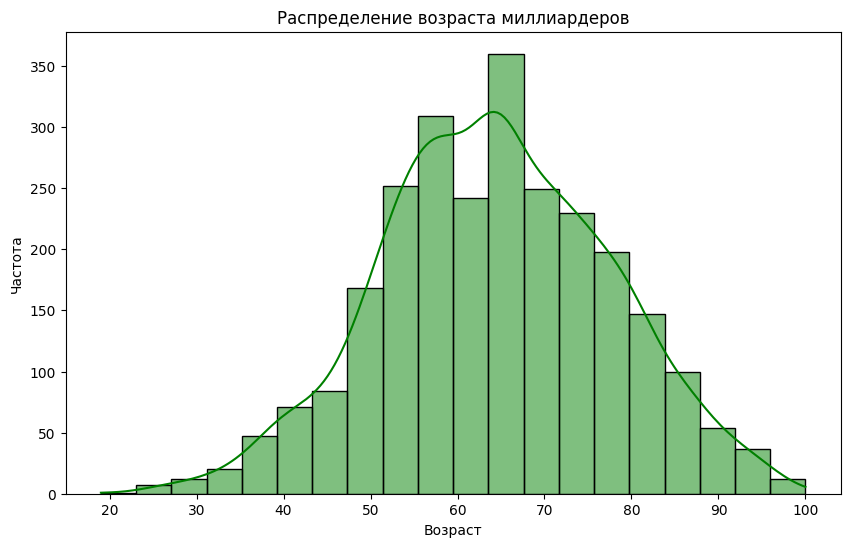

In [43]:
#2. Распределение возраста миллиардеров (Arlan)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='green')
plt.title('Распределение возраста миллиардеров')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

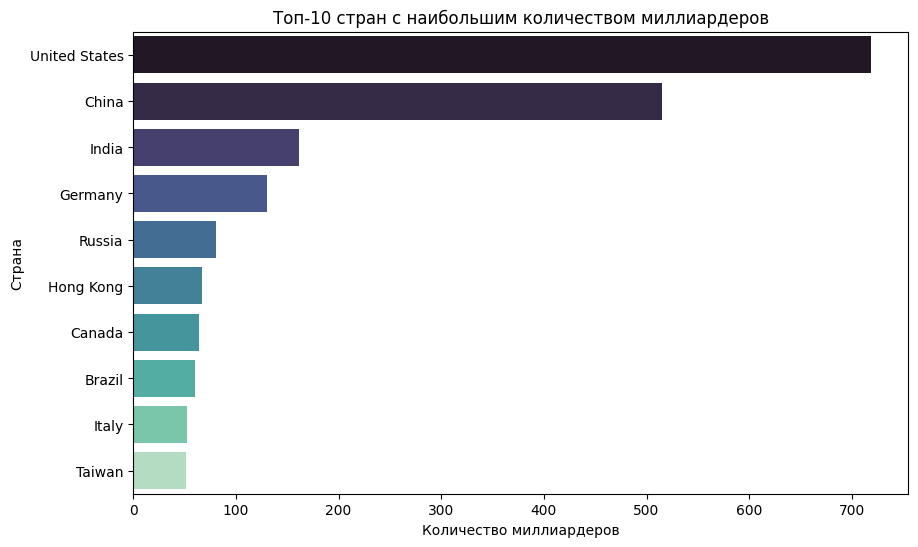

In [44]:
#3. Анализ топ-10 стран по количеству миллиардеров (Arlan)
top_10_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='mako')
plt.title('Топ-10 стран с наибольшим количеством миллиардеров')
plt.xlabel('Количество миллиардеров')
plt.ylabel('Страна')
plt.show()

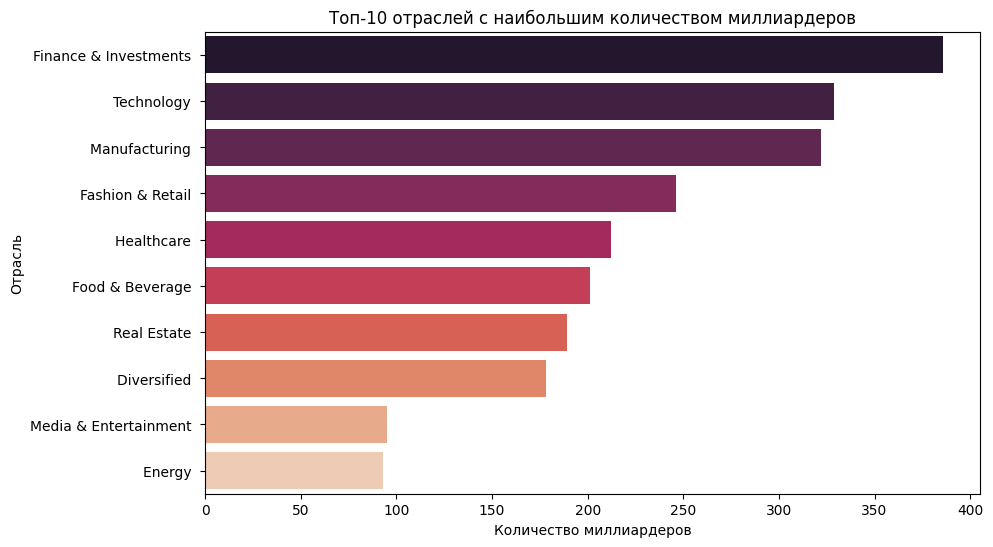

In [45]:
#4. Распределение миллиардеров по отраслям (Arlan)
top_10_industries = df['industry'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_industries.values, y=top_10_industries.index, palette='rocket')
plt.title('Топ-10 отраслей с наибольшим количеством миллиардеров')
plt.xlabel('Количество миллиардеров')
plt.ylabel('Отрасль')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


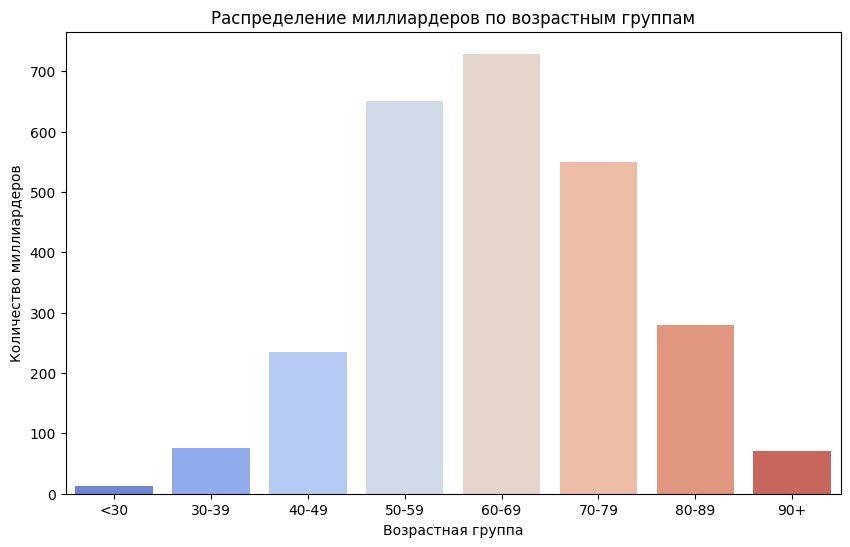

In [46]:
#5. Распределение миллиардеров по возрастным группам (Zhuldyz)
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')
plt.title('Распределение миллиардеров по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество миллиардеров')
plt.show()


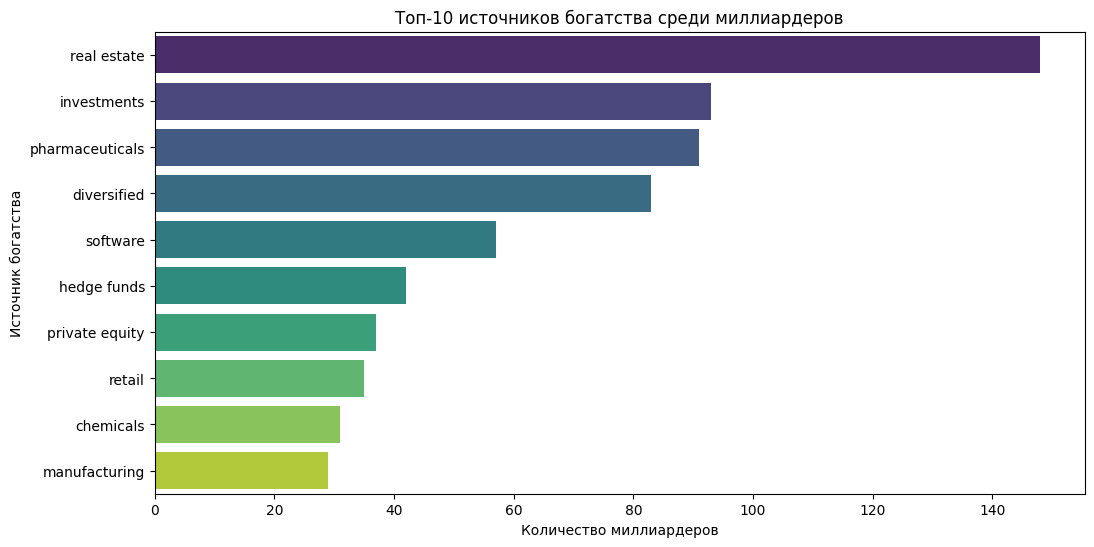

In [47]:
#6. Топ-10 источников богатства среди миллиардеров (Zhuldyz)
source_counts = df['source'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis')
plt.title('Топ-10 источников богатства среди миллиардеров')
plt.xlabel('Количество миллиардеров')
plt.ylabel('Источник богатства')
plt.show()


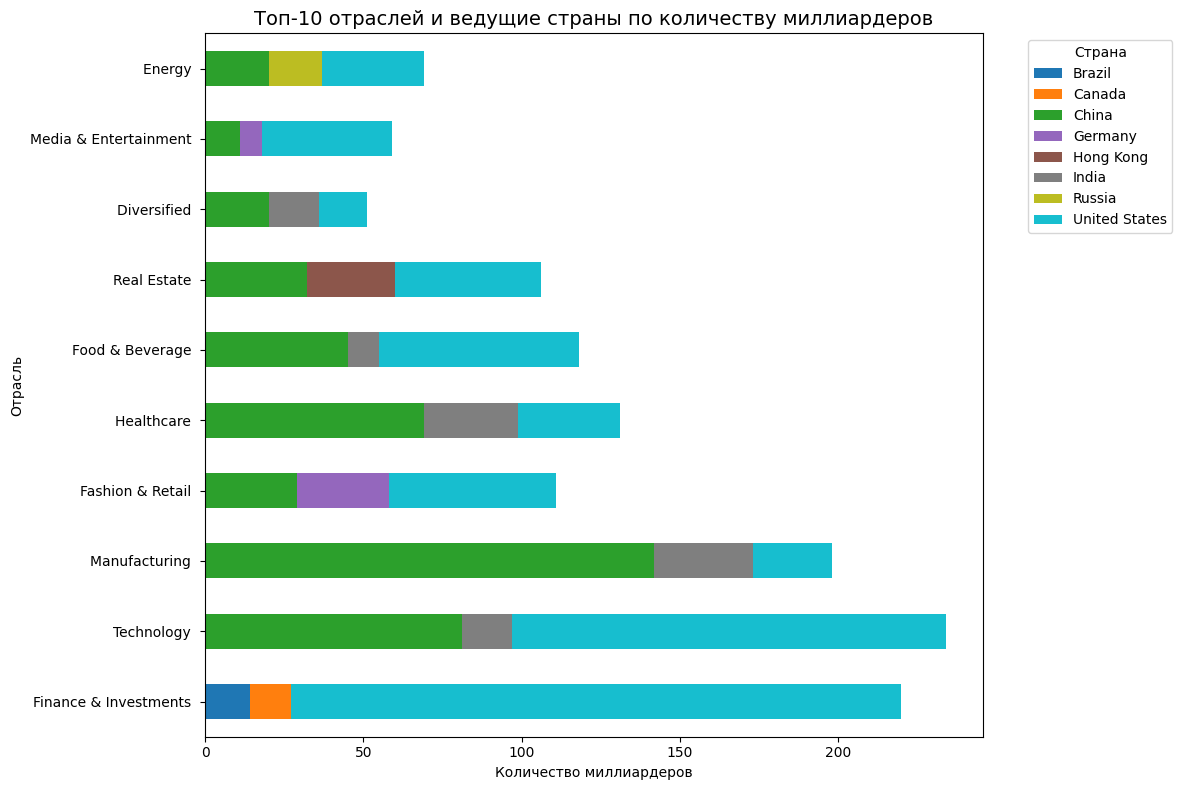

In [48]:
#7.Топ-10 отраслей и ведущие страны по количеству миллиардеров (Zhuldyz)
industry_country_counts = df.groupby(['industry', 'country']).size().reset_index(name='billionaire_count')
industry_totals = (
    industry_country_counts.groupby('industry')['billionaire_count']
    .sum()
    .sort_values(ascending=False)
)
top_industries = industry_totals.head(10).index
filtered_data = industry_country_counts[industry_country_counts['industry'].isin(top_industries)]
top_countries_per_industry = (
    filtered_data.groupby('industry')
    .apply(lambda x: x.nlargest(3, 'billionaire_count'))
    .reset_index(drop=True)
)
top_countries_per_industry['industry'] = pd.Categorical(
    top_countries_per_industry['industry'], categories=industry_totals.index, ordered=True
)
pivot_data = top_countries_per_industry.pivot_table(
    index='industry', columns='country', values='billionaire_count', fill_value=0
)
pivot_data = pivot_data.loc[top_industries]

pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10'
)
plt.title('Топ-10 отраслей и ведущие страны по количеству миллиардеров', fontsize=14)
plt.xlabel('Количество миллиардеров')
plt.ylabel('Отрасль')
plt.legend(title='Страна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


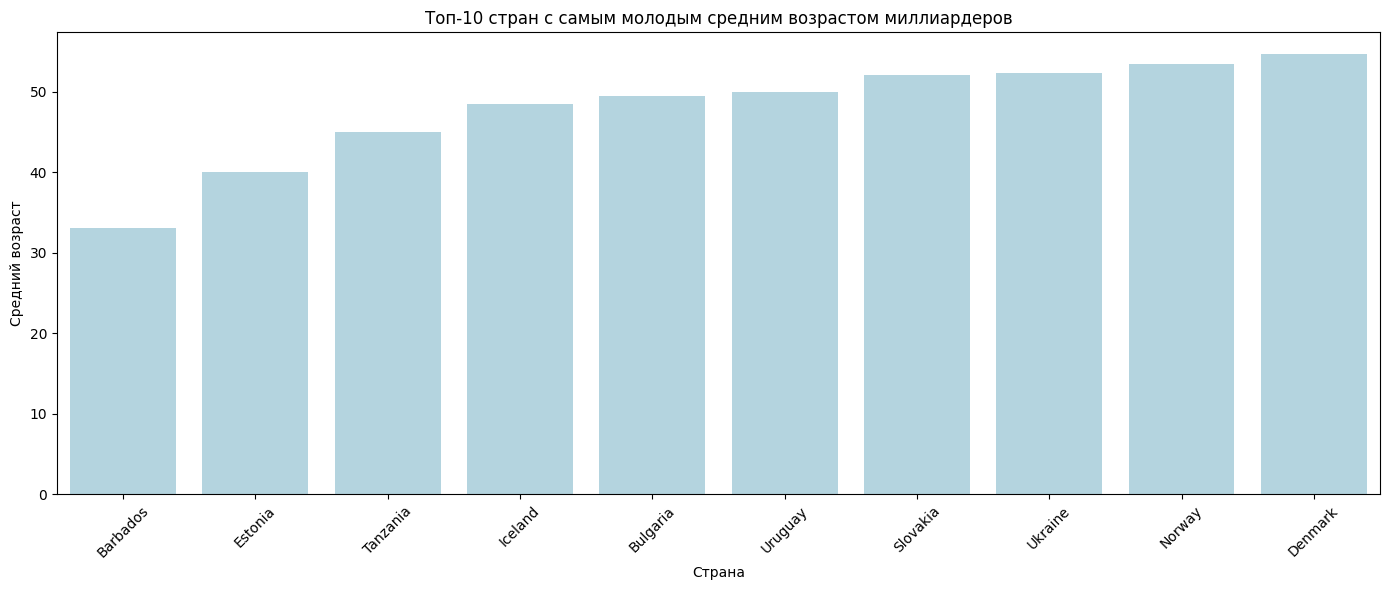

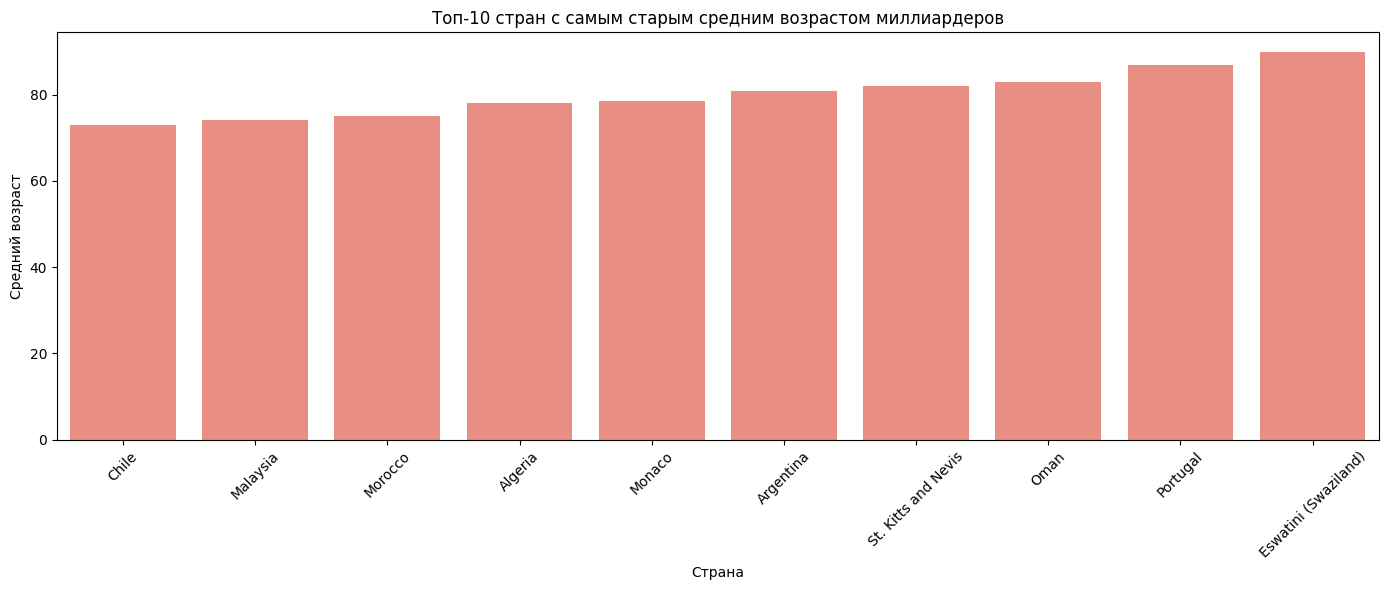

In [49]:
#8. Средний возраст миллиардеров для каждой страны (Shyngys)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

average_age_by_country = df.groupby('country')['age'].mean().sort_values()

top_10_youngest = average_age_by_country.head(10)
top_10_oldest = average_age_by_country.tail(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_10_youngest.index, y=top_10_youngest.values - 1, color='lightblue')
plt.title('Топ-10 стран с самым молодым средним возрастом миллиардеров')
plt.xlabel('Страна')
plt.ylabel('Средний возраст')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x=top_10_oldest.index, y=top_10_oldest.values, color='salmon')
plt.title('Топ-10 стран с самым старым средним возрастом миллиардеров')
plt.xlabel('Страна')
plt.ylabel('Средний возраст')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

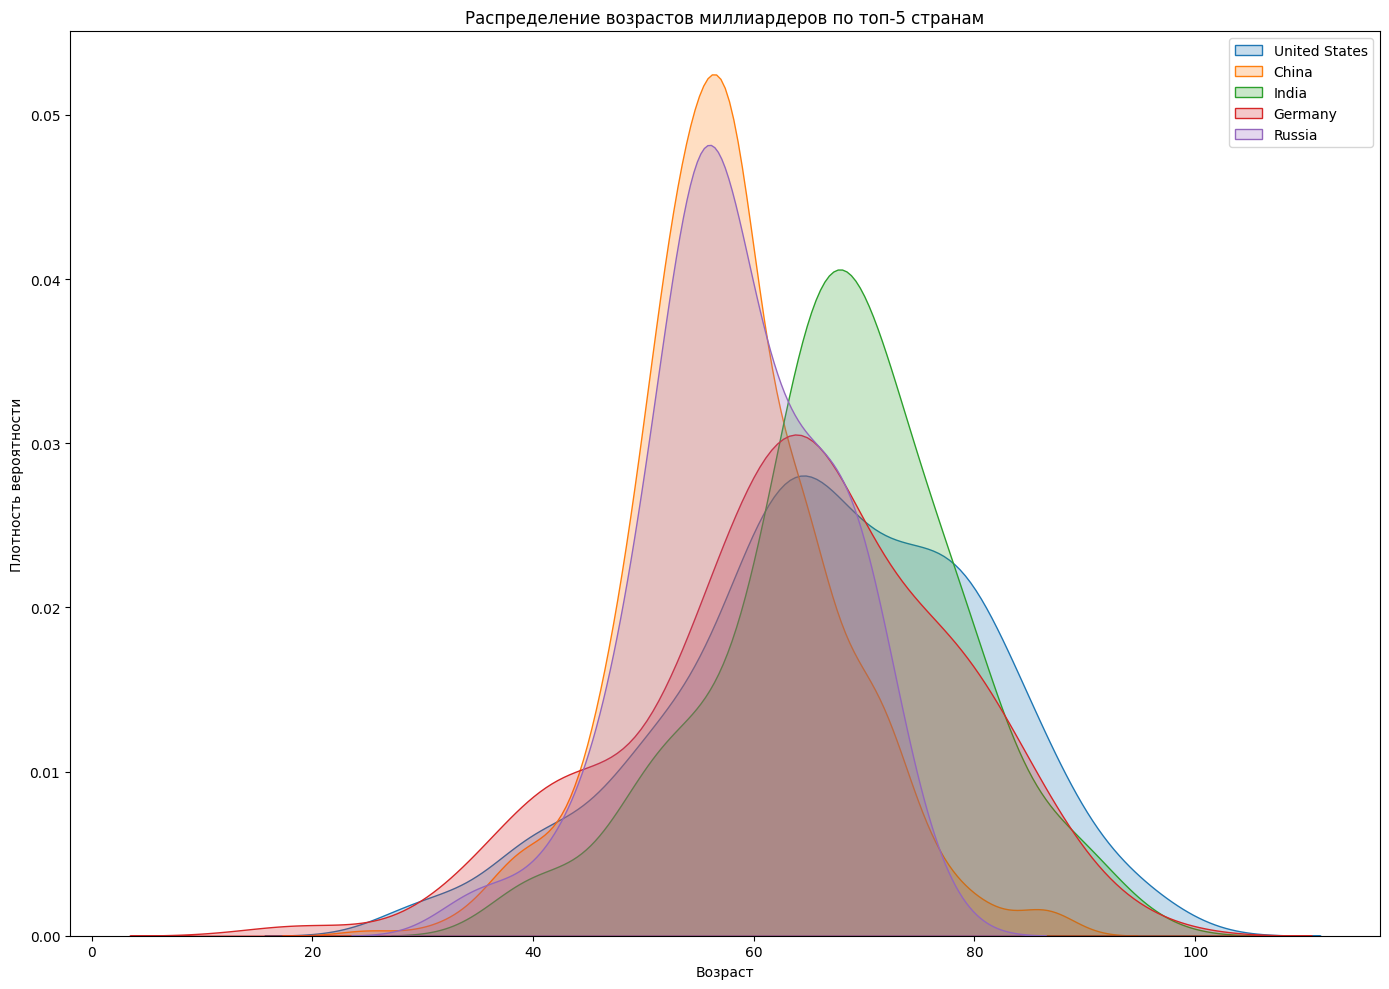

In [50]:
#9.Распределение миллиардеров по возрасту для топ-5 стран (Shyngys)
country_counts = df['country'].value_counts().head(5).index

top_5_countries_data = df[df['country'].isin(country_counts)]

plt.figure(figsize=(14, 10))
for country in country_counts:
    sns.kdeplot(top_5_countries_data[top_5_countries_data['country'] == country]['age'], label=country, fill=True)

plt.title('Распределение возрастов миллиардеров по топ-5 странам')
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.tight_layout()
plt.show()

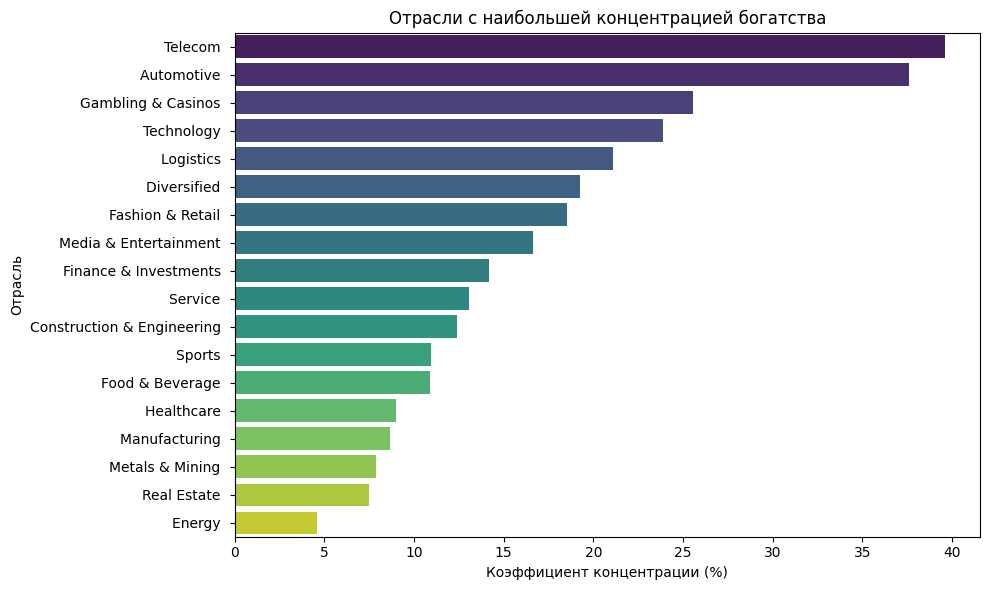

In [53]:
#10. Отрасли с наибольшей концентрацией богатства (Zhuldyz)
industry_total_wealth = df.groupby('industry')['networth'].sum()

# Calculate the 99th percentile net worth for each industry
industry_99th = df.groupby('industry')['networth'].quantile(0.99)

# Identify individuals above the 99th percentile in their industry
top_1_percent = df[df.apply(lambda x: x['networth'] > industry_99th[x['industry']], axis=1)]

# Calculate the total net worth of the top 1% per industry
top_1_percent_wealth = top_1_percent.groupby('industry')['networth'].sum()

# Calculate the concentration ratio
concentration_ratio = (top_1_percent_wealth / industry_total_wealth) * 100

most_concentrated_industries = concentration_ratio.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_concentrated_industries.values, y=most_concentrated_industries.index, palette='viridis')
plt.xlabel('Коэффициент концентрации (%)')
plt.ylabel('Отрасль')
plt.title('Отрасли с наибольшей концентрацией богатства')
plt.tight_layout()
plt.show()